# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. Parameters for DQN Algorithm

Parameters predefined for the DQN Vanilla Algorithm

In [6]:
from dqn_agent import Agent
from my_methods import dqn

rainbow={
    "DDQN": False,
    "PER": False,
    "Dueling": False}

n_episodes = 1500
max_t = 1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

### 5. DQN Vanilla Algorithm

Now it's time to train the agent to solve the environment!
It is possible to choose between the basic DQN and some improvements of the same algorithm. The actual implementation is limited to DDQN.

When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:

agent = Agent(rainbow, state_size=37, action_size=4, seed=0)

scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, env, agent, brain_name,'DQN_Vanilla.pth')


Episode 100	Average Score: 0.79
Episode 200	Average Score: 4.92
Episode 300	Average Score: 8.38
Episode 400	Average Score: 10.72
Episode 500	Average Score: 12.40
Episode 600	Average Score: 13.68
Episode 700	Average Score: 14.67
Episode 800	Average Score: 15.96
Episode 900	Average Score: 16.09
Episode 1000	Average Score: 16.23
Episode 1100	Average Score: 15.70
Episode 1200	Average Score: 14.89
Episode 1300	Average Score: 15.13
Episode 1400	Average Score: 16.09
Episode 1500	Average Score: 16.60

Agent learning for 1500 episodes!	Best Average Score: 16.77


### 6. Double DQN Algorithm
Here is the training of the agent with the Dual DQN Algorithm.


In [8]:
# Learning agent with Double DQ-Learning improvement 
rainbow["DDQN"] = True

DDQN_agent = Agent(rainbow, state_size=37, action_size=4, seed=0)

scores_DDQN = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, env, DDQN_agent, brain_name,'DDQN.pth')

rainbow["DDQN"] = False

Episode 100	Average Score: 0.19
Episode 200	Average Score: 3.29
Episode 300	Average Score: 6.83
Episode 400	Average Score: 10.04
Episode 500	Average Score: 12.83
Episode 600	Average Score: 14.66
Episode 700	Average Score: 14.63
Episode 800	Average Score: 15.66
Episode 900	Average Score: 15.46
Episode 1000	Average Score: 15.50
Episode 1100	Average Score: 15.80
Episode 1200	Average Score: 16.81
Episode 1300	Average Score: 15.37
Episode 1400	Average Score: 15.73
Episode 1500	Average Score: 15.97

Agent learning for 1500 episodes!	Best Average Score: 16.86


### 7. Dueling Networks DQN Algorithm
Here is the training of the agent with the Dueling networks variation of the DQN Algorithm.

In [9]:
# Learning agent with Dueling DQ-Learning improvement 
rainbow["Dueling"] = True

Duel_DQN_agent = Agent(rainbow, state_size=37, action_size=4, seed=0)

scores_Duel_DQN = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, env, Duel_DQN_agent, brain_name, 'Dual_DQN.pth')

rainbow["Dueling"] = False

Episode 100	Average Score: 0.26
Episode 200	Average Score: 0.47
Episode 300	Average Score: 0.75
Episode 400	Average Score: 1.34
Episode 500	Average Score: 1.29
Episode 600	Average Score: 1.75
Episode 700	Average Score: 2.96
Episode 800	Average Score: 3.61
Episode 900	Average Score: 5.04
Episode 1000	Average Score: 5.56
Episode 1100	Average Score: 10.12
Episode 1200	Average Score: 12.14
Episode 1300	Average Score: 13.83
Episode 1400	Average Score: 13.69
Episode 1500	Average Score: 13.74

Agent learning for 1500 episodes!	Best Average Score: 14.23


### 8. Combining Double DQN Algorithm with Dueling Network Architecture
Here is the training of the agent with the Dueling networks variation of the DQN Algorithm.

In [11]:
# Learning agent with Dueling DQ-Learning improvement
rainbow["DDQN"] = True
rainbow["Dueling"] = True

Duel_DDQN_agent = Agent(rainbow, state_size=37, action_size=4, seed=0)

scores_Duel_DDQN = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, env, Duel_DDQN_agent, brain_name, 'Duel_DDQN.pth')

Episode 100	Average Score: -0.20
Episode 200	Average Score: 0.001
Episode 300	Average Score: 0.582
Episode 400	Average Score: 1.24
Episode 500	Average Score: 3.79
Episode 600	Average Score: 5.30
Episode 700	Average Score: 8.07
Episode 800	Average Score: 13.20
Episode 900	Average Score: 15.02
Episode 1000	Average Score: 15.65
Episode 1100	Average Score: 16.30
Episode 1200	Average Score: 16.25
Episode 1300	Average Score: 16.13
Episode 1400	Average Score: 16.28
Episode 1500	Average Score: 17.21

Agent learning for 1500 episodes!	Best Average Score: 17.29


### 9. Algorithm Comparison
The code below collects and trends the learning process along the episodes for the DQN and DDQN solutions.
A moving avarage has been used to reduce the noise of the results and make more readable the trends.

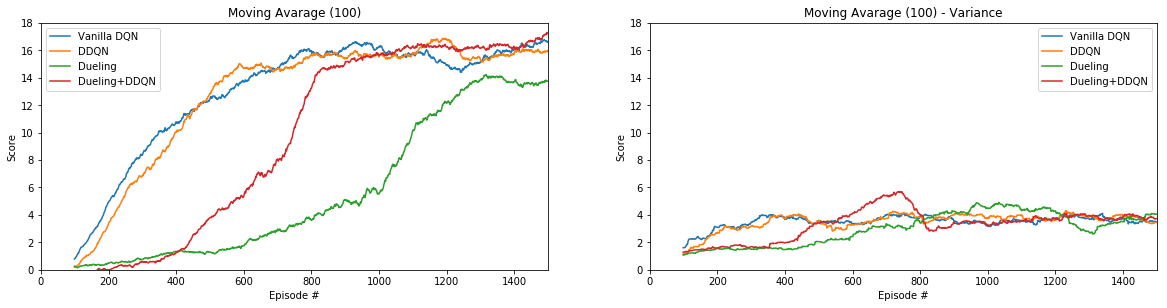

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Window mean avarage
Win = 100
Win2 = 10

# Dataframes to calculate the moving avarage on scores
df = pd.DataFrame({'score': scores})
df2 = pd.DataFrame({'score_DDQN': scores_DDQN})
df3 = pd.DataFrame({'score_Duel_DQN': scores_Duel_DQN})
df4 = pd.DataFrame({'score_Duel_DDQN': scores_Duel_DDQN})

# plot the score moving avarages to reduce the noise
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(221)
plt.title("Moving Avarage (" + str(Win) + ")")
plt.plot(np.arange(len(scores)), df.rolling(window=Win).mean())
plt.plot(np.arange(len(scores_DDQN)), df2.rolling(window=Win).mean())
plt.plot(np.arange(len(scores_Duel_DQN)), df3.rolling(window=Win).mean())
plt.plot(np.arange(len(scores_Duel_DDQN)), df4.rolling(window=Win).mean())
plt.ylim(0,18)
plt.xlim(0,1500)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(['Vanilla DQN', 'DDQN', 'Dueling','Dueling+DDQN'])

bx = fig.add_subplot(222)
plt.title("Moving Avarage (" + str(Win) + ") - Variance")
plt.plot(np.arange(len(scores)), df.rolling(window=Win).std())
plt.plot(np.arange(len(scores_DDQN)), df2.rolling(window=Win).std())
plt.plot(np.arange(len(scores_Duel_DQN)), df3.rolling(window=Win).std())
plt.plot(np.arange(len(scores_Duel_DDQN)), df4.rolling(window=Win).std())
plt.ylim(0,18)
plt.xlim(0,1500)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(['Vanilla DQN', 'DDQN', 'Dueling','Dueling+DDQN'])


plt.show()

### 10. Trained Agent
Perform of the trained Agent

In [15]:
import torch

env_info = env.reset(train_mode=False)[brain_name] # reset the environment

# load the weights from file
Duel_DDQN_agent.qnetwork_local.load_state_dict(torch.load('saved/Duel_DQN.pth'))

state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)
    action = action.astype(np.int32)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

FileNotFoundError: [Errno 2] No such file or directory: 'saved/Duel_DQN.pth'

When finished, you can close the environment.

In [ ]:
env.close()